### About the dataset
TMBD is a movies dataset compiled from IMDB.com and hosted by Kaggle here https://www.kaggle.com/tmdb/tmdb-movie-metadata

dataset has 10866 rows and 22 columns. Which include; movie title, imdb_id, popularity, rating, cast, genre, release_date and other overall details about a movie 

#### Questions I wondered from looking at the dataset 

Require revenue and budget:
- do high budget moves often release in specific months (like for Christmas and holidays)
- which genres have the lowest budgets, among them which makes the highest returns 
- which movies have a high rating and high votes but not profitable. (if so, google how did that happen)
- vote count vs. revenue (do we have less voted but high revenue movies? if so, are they the old ones?)
- go back in time to invest in studios and directors. which ones would you pick to maximize returns?(5-year bins?)
- actors with the highest # movies, what are their avg score and revenue
- highest/lowest avg rated actors. #ratings high, played latest in 8? movies. what are their avg rev/budget 
- if we were to divide profit equally among the cast, who would be the richest

Require production companies:
- what are the prod companies that made more than 5+? movies and has the highest return on average
- which studios do big-budget movies? Do they also do low budgets

Require genre:
- does having a lot of genre 3+ is helpful to make a high revenue movie. 
- is increasing the number of the genre in the movie require more budget. Does low budget movies have 3+ genre?
- which genres appear less together. does it makes sense. are their budget high to make that combination
- which genres appear together. (are there a clear distinction between these genres, or are we not using them correctly)
- which actors appear together


No specific requirement:
- what day of the week movies often release (expectation: Friday).
- does the old movies (<80) have a higher rating and lower #votes.


#### Rest of the questions 
- does the tagline include anything from movie name, do keywords appear in the movie name or in tagline
- reverse engineer inflation from rev/rev adj. plot it  
- which actors/directors made a comeback. high score first, low on a series of moves, then increased again 
- what are the movies with high budget and long runtime with low rating. (could they be saved if movie was shorter, google) 


In [1]:
# required for series explode function
!pip3 install pandas==0.25.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# imdb movie dataset source -> https://www.kaggle.com/tmdb/tmdb-movie-metadata

# udacity version 
moviesdb_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"

df = pd.read_csv(moviesdb_url)

## Exploratory Data Analysis


In [3]:
### Cheatsheet I prepared from this project

### info about the datatset
# df.shape
# df.columns
# df.head()
# df.iloc[0]
# df.describe()
# df.info()
# df.isnull().sum()
# df.nunique()
# df.hist()

### to clear db
# sum(df.duplicated())
# (df.revenue == 0).sum()
# df.loc[df.revenue == 0]


### detail
# df.corr()

In [4]:
df.shape

(10866, 21)

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Notes:
- trim popularity
- use adjusted revenue and budget instead of originals
- cast, genres and production companies has multiple info divided by |
- keep release date and drop release year
- adj budget and revenue as ints ?

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
sum(df.duplicated())

1

In [9]:
(df.budget == 0).sum()

5696

In [10]:
df.loc[df.budget == 0].head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07


Notes:
- budgets with 0 
- homepage, tagline, keywords and prod companies have a lot of null values. since they are strings it won't be easy to fill with means
- 1 duplicate

## Wrangling tasks

### Format Todo

- dates column is str, could be in date format
- popularity could be rounded
- revenue, budget, and their adjusted values could be the same type and rounded (int)
- genere, cast, production_companies -> contain more than one data splited by | . they might need to be splitted

### Remove Todos

- hompage, tagline, keywords and production_companies -> contain a lot of null values
- columns to drop to answer most of the questions (release_year, imdb_id, homepage, budget, revenue, tagline, overview)
- drop one duplicate
- there are 0 revenue items. for related calculations they need to be removed (are they accurate, maybe they didn't earn anything, but 0 budget doesn't seem reasonable)
- release date = 2070 ? 


In [11]:
### Wrangling cheatsheet I prepared from this project

### Format
# pd.to_datetime(df['___'])
# round(df['___'],2)
# df['___'].astype(int)


### Remove
# df.drop_duplicates(keep ='first', inplace=True)


### Examine
# df['___'].value_counts()

## Format Data

In [12]:
# convert date str to datetime

df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
# rows with possibly wrong release dates
# ignored for now
df.loc[df.release_date >  pd.Timestamp(2030,1,1)].shape

(403, 21)

In [14]:
# round popularity to two digits

df['popularity'] = round(df['popularity'],2)
df['popularity'][0]

32.99

In [15]:
# adjusted values has float precission. For currency I think it is not necessary

df['budget_adj'] = df['budget_adj'].astype(np.int64)
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

In [16]:
df['budget_adj'][0]

137999939

## Data Remove

In [17]:
# drop the duplicate row

df.drop_duplicates(keep ='first', inplace=True)
sum(df.duplicated())

0

In [18]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [19]:
# Drop columns that I don't plan to use
df = df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'release_year', 'overview'], axis=1)

In [20]:
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892


In [21]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
# Drop 0 values of budget and revenue
# https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

df_filtered = df.loc[~(df.budget_adj==0)]
df_filtered = df_filtered.loc[~(df.revenue_adj==0)]

In [23]:
# remove negative revenue movies
df_filtered = df_filtered.loc[~(df_filtered.revenue_adj <= 0)]

In [24]:
# Drop na cast
df_filtered['cast'].dropna(inplace=True)

## Add cloumns

In [25]:
# to see the investment / revenue difference
df_filtered['return_multiplier'] = df_filtered.revenue_adj / df_filtered.budget_adj

In [26]:
df_filtered.return_multiplier.head()

0    10.090192
1     2.522909
2     2.683984
3    10.340891
4     7.927628
Name: return_multiplier, dtype: float64

# Questions 

Require revenue and budget:
- vote count vs. revenue (do we have less voted but high revenue movies? if so, are they the old ones?)

## Q1: do high budget moves often release in specific months

In [27]:
# plots monthly bar chart given dataframe with date in it
#  https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas/44908576

def release_by_month(df_input, title):
    df_release_by_month = df_input.groupby(df_input.release_date.dt.strftime('%m-%B')).size() 
    ax = df_release_by_month.plot(kind='bar',  title=title)
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of movies")


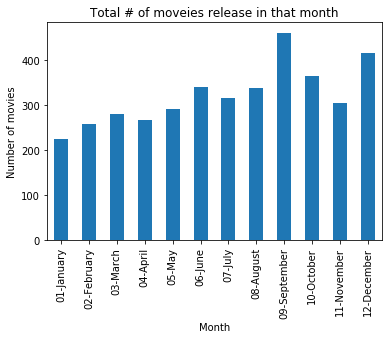

In [28]:
release_by_month(df_filtered, 'Total # of moveies release in that month')

Among all movies December and September has the highest release date. Christmas and winter time might have an effect on this

In [29]:
high_budget = 50000000 #50 M$
df_high_budget = df_filtered[df_filtered.budget_adj > high_budget]
df_high_budget.shape

(1206, 14)

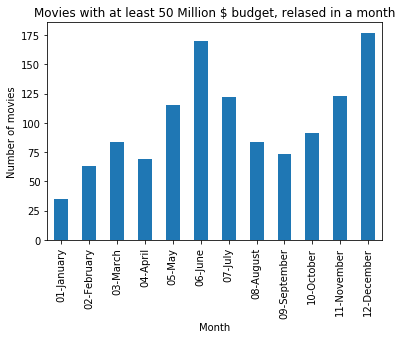

In [30]:
release_by_month(df_high_budget, "Movies with at least 50 Million $ budget, relased in a month")

In [31]:
low_budget = 5000000 #5 M$
df_low_budget = df_filtered[df_filtered.budget_adj < low_budget]
df_low_budget.shape

(413, 14)

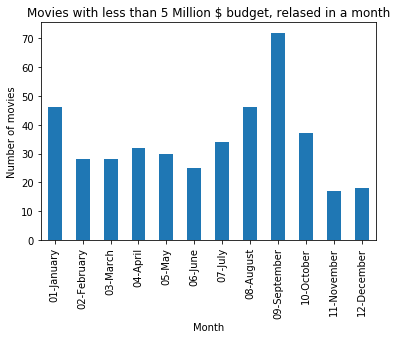

In [32]:
release_by_month(df_low_budget, "Movies with less than 5 Million $ budget, relased in a month")

Seems like high revenue movies often get june and december, while low budget movies avoid those months.

In [33]:
df_filtered.groupby(pd.Grouper(key='release_date',freq='1Y')).count().sort_values(by='id', ascending=False)['id'].head()

release_date
2011-12-31    198
2013-12-31    180
2010-12-31    178
2009-12-31    174
2006-12-31    169
Name: id, dtype: int64

2011 december has most releases in a month, followed by decembers of 2013 an 2010

## Q2: What day of the week movies often release (expectation: Friday)

Text(0,0.5,'Number of movies')

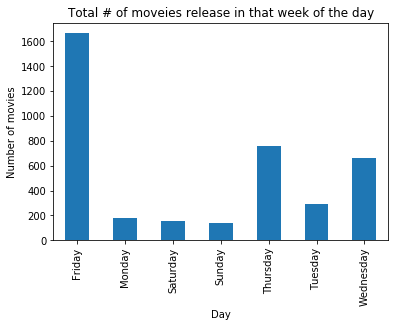

In [34]:
# strftime %A gives the week of the day --> similar to dt.dayofweek

df_release_by_day_of_the_week = df_filtered.groupby(df_filtered.release_date.dt.strftime('%A')).size() 
ax = df_release_by_day_of_the_week.plot(kind='bar',  title='Total # of moveies release in that week of the day')
ax.set_xlabel("Day")
ax.set_ylabel("Number of movies")

## Q3: Which genres have the lowest budgets, among them which makes the highest returns 

In [35]:
df_filtered.genres.count()

3853

In [36]:
df_filtered.genres.isnull().sum()

0

In [37]:
df_filtered.genres.value_counts().tail(25)

Thriller|Mystery|Adventure                           1
Mystery|Crime|Drama                                  1
Action|Adventure|Animation|Science Fiction           1
Adventure|Action|Thriller|Crime|Mystery              1
Horror|Romance|Science Fiction                       1
Action|Thriller|Science Fiction|Mystery|Adventure    1
Romance|Fantasy|Drama|Comedy                         1
Animation|Action|Family|Science Fiction              1
Fantasy|Mystery|Thriller                             1
Music|Crime|Drama                                    1
Romance|Comedy|Crime|Fantasy                         1
Comedy|Action|Adventure|Fantasy|Science Fiction      1
Family|Comedy|Drama                                  1
Action|Adventure|Drama|Science Fiction               1
Thriller|Crime|Science Fiction|Mystery               1
War|Adventure|Drama                                  1
Comedy|Horror|Romance                                1
Mystery|Thriller|Horror                              1
Adventure|

looks like genres not sorted alphabetically, but by importance

In [38]:
# get the first genre
df_filtered['top_genre'] = df_filtered['genres'].apply(lambda x: x.split('|')[0])

In [39]:
df_filtered.top_genre.value_counts()

Drama              890
Comedy             786
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: top_genre, dtype: int64

In [40]:
df_genres = df_filtered.groupby(df_filtered.top_genre)['budget_adj'].sum().sort_values()

In [41]:
df_genres

top_genre
TV Movie               6951083
Documentary          157631910
History              848931763
Western              990152009
Music               1247514543
War                 1282033675
Mystery             1321269461
Romance             2095743083
Family              2697950232
Horror              5352125248
Crime               5438026940
Thriller            6045470926
Science Fiction     6125723873
Fantasy             7045587434
Animation           8797426781
Comedy             24439867213
Adventure          27054153846
Drama              27487332671
Action             42067038797
Name: budget_adj, dtype: int64

TV Movie, Documentary, History, Western and music have the lowest buddgets

In [42]:
low_budget_genre_names = ['TV Movie', 'Documentary', 'History', 'Western', 'Music']

In [43]:
low_budget_genres = df_filtered[df_filtered.top_genre.isin(low_budget_genre_names)].sort_values(by='return_multiplier', ascending=False)

In [44]:
low_budget_genres[low_budget_genres.vote_count > 700].head(10)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,return_multiplier,top_genre
10755,621,1.70,Grease,John Travolta|Olivia Newton-John|Stockard Chan...,Randal Kleiser,110,Music,Paramount Pictures|Robert Stigwood Organizatio...,1978-07-07,786,7.0,20056204,607749015,30.302295,Music
636,205596,8.11,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,2014-11-14,3478,8.0,12895274,215126072,16.682551,History
5,281957,9.11,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,124199945,490314247,3.947782,Western
6587,9836,1.41,Happy Feet,Lombardo Boyar|Robin Williams|Johnny A. Sanche...,George Miller,108,Music|Animation|Comedy|Family,Village Roadshow Pictures|Kennedy Miller Produ...,2006-11-16,876,5.8,108166915,415723973,3.843356,Music
2642,676,2.48,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,Michael Bay,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,2001-05-21,1044,6.6,172408336,553210255,3.208721,History
1446,11322,1.14,Public Enemies,Christian Bale|Johnny Depp|Giovanni Ribisi|Bil...,Michael Mann,140,History|Crime|Drama,Universal Pictures|Appian Way|Forward Pass|Den...,2009-07-01,853,6.5,81312034,217616028,2.676308,History
7443,5176,1.15,3:10 to Yuma,Russell Crowe|Christian Bale|Logan Lerman|Dall...,James Mangold,122,Western,Tree Line Films|Lionsgate|Relativity Media|Yuma,2007-09-06,762,6.8,57841772,73633858,1.273022,Western
42,321697,3.08,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,Danny Boyle,122,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,2015-10-09,1035,6.9,27599987,31686509,1.148062,History


among low budget genres, these have higher vote counts and made good returns for their studios

## Q4: Which movies have a high rating and high votes but not profitable. (if so, google how did that happen)

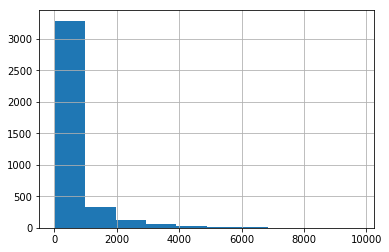

In [45]:
df_filtered.vote_count.hist()

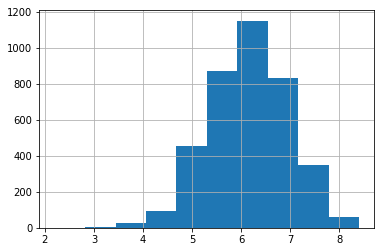

In [46]:
df_filtered.vote_average.hist()

Looking at the histograms, I decedied on avg score >  7 and avg count > 1000

In [47]:
df_filtered[(df_filtered.vote_average > 7) & (df_filtered.vote_count > 1000)].sort_values(by='return_multiplier', ascending=True).head(5)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,return_multiplier,top_genre
2636,141,3.85,Donnie Darko,Jake Gyllenhaal|Patrick Swayze|Drew Barrymore|...,Richard Kelly,113,Fantasy|Drama|Mystery,Pandora Cinema|Flower Films|Adam Fields Produc...,2001-01-18,1777,7.5,7388928,1564632,0.211754,Fantasy
5234,782,3.08,Gattaca,Ethan Hawke|Jude Law|Gore Vidal|Uma Thurman|Al...,Andrew Niccol,106,Thriller|Science Fiction|Mystery|Romance,Columbia Pictures|Jersey Films,1997-09-07,1117,7.3,48904571,17025280,0.348133,Thriller
701,206487,2.12,Predestination,Ethan Hawke|Sarah Snook|Noah Taylor|Christophe...,Michael Spierig|Peter Spierig,97,Science Fiction|Thriller,Screen Australia|Screen Queensland|Blacklab En...,2014-08-28,1136,7.2,5066000,2763273,0.545455,Science Fiction
1944,22538,1.91,Scott Pilgrim vs. the World,Michael Cera|Mary Elizabeth Winstead|Kieran Cu...,Edgar Wright,112,Action|Adventure|Comedy,Universal Pictures|Marc Platt Productions,2010-07-27,1258,7.2,60000000,47664559,0.794409,Action
6568,9693,2.11,Children of Men,Clive Owen|Michael Caine|Julianne Moore|Charli...,Alfonso CuarÃ³n,109,Drama|Action|Thriller|Science Fiction,Universal Pictures|Strike Entertainment|Hit & ...,2006-09-22,1211,7.3,82206856,75673304,0.920523,Drama


- Donnie darko retruns are not right here (it made $7.5M which would pit it after 'children of men')
- Gattaca and Predestination. Good reviews on google. not much on why the box office is low.
- Ethan Hawke leads in both movies. Strange.
- I watched all except Gattaca. It was not on my radar, I got curious and watched it. Good cast and ok scenario/acting. However it was graphic. It might have been the issue behind low revenue

## Q5: if we were to divide profit equally among the cast, who would be the richest

In [48]:
df_filtered.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'budget_adj', 'revenue_adj', 'return_multiplier',
       'top_genre'],
      dtype='object')

In [49]:
df_cast = df_filtered
df_cast['cast'].dropna(inplace=True)

In [50]:
df_cast['num_cast_members']= df_cast['cast'].apply(lambda x: len(x.split('|')))

In [51]:
# https://stackoverflow.com/questions/58839622/pandas-split-and-expand-two-columns

df_cast = df_cast.drop('cast', axis=1)
df_cast = df_cast.join(df_filtered['cast'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('cast'))

df_cast.shape

(19195, 16)

In [52]:
df_cast.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,return_multiplier,top_genre,num_cast_members,cast
0,135397,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0,Chris Pratt
0,135397,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0,Bryce Dallas Howard
0,135397,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0,Irrfan Khan
0,135397,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0,Vincent D'Onofrio
0,135397,32.99,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0,Nick Robinson


In [53]:
df_filtered.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,return_multiplier,top_genre,num_cast_members
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,137999939,1392445892,10.090192,Action,5.0


Cast part splitted and expanded to new rows with same other values

In [54]:
# New column for income
df_cast['income'] = df_cast.apply(lambda x: x.revenue_adj/x.num_cast_members , axis=1)

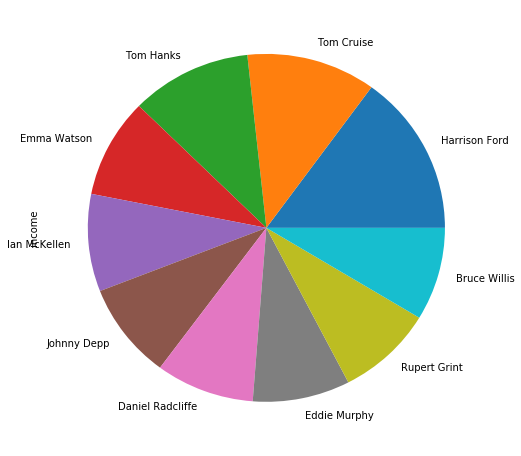

In [55]:
df_cast.groupby(df_cast.cast)['income'].sum().sort_values(ascending=False).head(10).plot.pie(y='income', figsize=(8,8))

## Q6: actors with the highest # movies, what are their avg score and revenue

In [56]:
df_cast.shape

(19195, 17)

In [57]:
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby

df_cast_by_movie_count = df_cast.groupby(df_cast.cast).agg(['count', 'mean']).sort_values(by=('vote_average', 'count'), ascending=False)[['vote_average','revenue_adj']]

In [58]:
df_cast_by_movie_count.head(10)

vote_average           revenue_adj              
                          count      mean       count          mean
cast                                                               
Robert De Niro               52  6.398077          52  1.245128e+08
Bruce Willis                 46  6.054348          46  1.790538e+08
Samuel L. Jackson            44  6.270455          44  1.806471e+08
Nicolas Cage                 43  5.918605          43  1.274347e+08
Matt Damon                   36  6.455556          36  1.549264e+08
Johnny Depp                  35  6.471429          35  2.433724e+08
Sylvester Stallone           34  6.029412          34  2.002138e+08
Tom Hanks                    34  6.741176          34  3.068681e+08
Harrison Ford                34  6.452941          34  4.201675e+08
Morgan Freeman               34  6.411765          34  1.376819e+08

it looks like winner is Harrison Ford. with highest revenue and above avg rating (among serial movie makers)

## Q7: Which actors appear together

In [59]:
df_filtered.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'budget_adj', 'revenue_adj', 'return_multiplier',
       'top_genre', 'num_cast_members'],
      dtype='object')

In [60]:
# after some research I found out that this is called affinity analysis
# found a good post about ingridients that appear in market basket analysis. 
# https://towardsdatascience.com/market-basket-analysis-with-pandas-246fb8ee10a5

In [61]:
df_cast_com = df_filtered
df_cast_com.cast.dropna(inplace= True)
df_cast_com = df_cast_com.cast.apply(lambda x: x.split('|'))
df_cast_com.head(2)

0    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1    [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
Name: cast, dtype: object

In [62]:
import itertools

In [63]:
# first movie, combinations of 2
list(itertools.combinations(df_cast_com[0], 2))

[('Chris Pratt', 'Bryce Dallas Howard'),
 ('Chris Pratt', 'Irrfan Khan'),
 ('Chris Pratt', "Vincent D'Onofrio"),
 ('Chris Pratt', 'Nick Robinson'),
 ('Bryce Dallas Howard', 'Irrfan Khan'),
 ('Bryce Dallas Howard', "Vincent D'Onofrio"),
 ('Bryce Dallas Howard', 'Nick Robinson'),
 ('Irrfan Khan', "Vincent D'Onofrio"),
 ('Irrfan Khan', 'Nick Robinson'),
 ("Vincent D'Onofrio", 'Nick Robinson')]

In [64]:
combinations_list = []
for row in df_cast_com:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [65]:
len(combinations_list)

3849

In [66]:
combinations_list[:1]

[[('Chris Pratt', 'Bryce Dallas Howard'),
  ('Chris Pratt', 'Irrfan Khan'),
  ('Chris Pratt', "Vincent D'Onofrio"),
  ('Chris Pratt', 'Nick Robinson'),
  ('Bryce Dallas Howard', 'Irrfan Khan'),
  ('Bryce Dallas Howard', "Vincent D'Onofrio"),
  ('Bryce Dallas Howard', 'Nick Robinson'),
  ('Irrfan Khan', "Vincent D'Onofrio"),
  ('Irrfan Khan', 'Nick Robinson'),
  ("Vincent D'Onofrio", 'Nick Robinson')]]

In [67]:
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

In [68]:
combination_counts.value_counts()[:20]

(Daniel Radcliffe, Emma Watson)        8
(Daniel Radcliffe, Rupert Grint)       8
(Rupert Grint, Emma Watson)            7
(William Shatner, Leonard Nimoy)       6
(Leonard Nimoy, James Doohan)          6
(William Shatner, James Doohan)        6
(Johnny Depp, Helena Bonham Carter)    6
(Sylvester Stallone, Burt Young)       6
(Ben Stiller, Owen Wilson)             6
(William Shatner, George Takei)        6
(Leonard Nimoy, George Takei)          6
(DeForest Kelley, James Doohan)        5
(Adam Sandler, Kevin James)            5
(William Shatner, DeForest Kelley)     5
(James Doohan, George Takei)           5
(Leonard Nimoy, DeForest Kelley)       5
(DeForest Kelley, George Takei)        5
(Hugh Jackman, Ian McKellen)           5
(Talia Shire, Burt Young)              5
(Kristen Stewart, Robert Pattinson)    5
dtype: int64

Actors who appear together in movies with count.

Harry potter, star trek, rocky, xman it makes sense that movies with series has actors that appear together. 

Johnny Depp and Helena put a smile on my face :) Tim burton should be the common director

this was fun

# Conclusions

About the limitations of the dataset
- Dataset has missing, na, 0 and wrong values (release dates, negative infinite revenues, not uptodate revenue (like in Donnie darko))
- Cast and genre is limited by max 5 values


Some of the answers I got from the dataset
- `December` is the month that has most of the releases in e year
- `Friday` is the week of the day that gets most releases in a week
- `Documentary`, `History`, `Western` and `Music` genres often has the lowest budgets. Among them `Grease` and `The Imitation Game` made highest returns
- `Gattaca` and `Predestination` had high budgets, received good scores and rated by many. However their return is low. Not much on the topic on the web. 
- Among the actors with 30+ movies, `Harrison Ford` is the outlier with high user scors and high box office
- Series like `Harry Potter` makes some actors appear togheter multiple times in different movies. Seems like exceptions to these accour when the director has a core cast team like `Johnny Depp` and `Helena Bonham Carter`


In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0